<a href="https://colab.research.google.com/github/Yelo13/Project.plot/blob/main/Anime_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime.csv


In [ ]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
numerica=df.drop(['genre', 'type'], axis=1)
numerica.head()

,anime_id,name,episodes,rating,members
0,32281,Kimi no Na wa.,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665
2,28977,Gintama°,51,9.25,114262
3,9253,Steins;Gate,24,9.17,673572
4,9969,Gintama&#039;,51,9.16,151266


In [ ]:
categorica=df.filter(['type'])
categorica.head()

,type
0,Movie
1,TV
2,TV
3,TV
4,TV


In [ ]:
categorica.iloc[:,0] #variable ni idea de cual
cat_numerical=pd.get_dummies(categorica.iloc[:,0], drop_first=True)
cat_numerical

,Music,ONA,OVA,Special,TV
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
12289,0,0,1,0,0
12290,0,0,1,0,0
12291,0,0,1,0,0
12292,0,0,1,0,0


In [ ]:
from sklearn.cluster import AffinityPropagation
df=pd.concat([numerica, cat_numerical], axis=1)
df = df.drop(df[150:12294].index)
df

,anime_id,name,episodes,rating,members,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0,0,0,0,1
2,28977,Gintama°,51,9.25,114262,0,0,0,0,1
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,1
4,9969,Gintama&#039;,51,9.16,151266,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
145,137,Hunter x Hunter OVA,8,8.41,53168,0,0,1,0,0
146,139,Hunter x Hunter: Greed Island Final,14,8.41,55787,0,0,1,0,0
147,23317,Kuroshitsuji: Book of Murder,2,8.41,67261,0,0,1,0,0
148,558,Major S2,26,8.41,30689,0,0,0,0,1


In [ ]:
df.groupby(['Music', 'ONA',	'OVA',	'Special',	'TV']).size().reset_index(name='types')

,Music,ONA,OVA,Special,TV,types
0,0,0,0,0,0,32
1,0,0,0,0,1,102
2,0,0,0,1,0,3
3,0,0,1,0,0,13


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


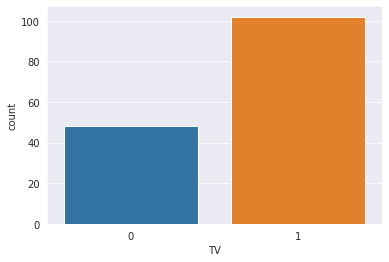

In [ ]:

sns.set_style('darkgrid')
sns.countplot(x='TV', data = df)

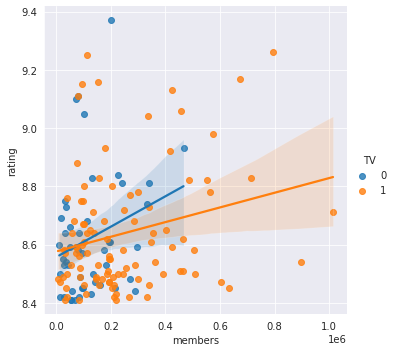

In [ ]:
sns.lmplot( x='members', y='rating', hue='TV', data= df)

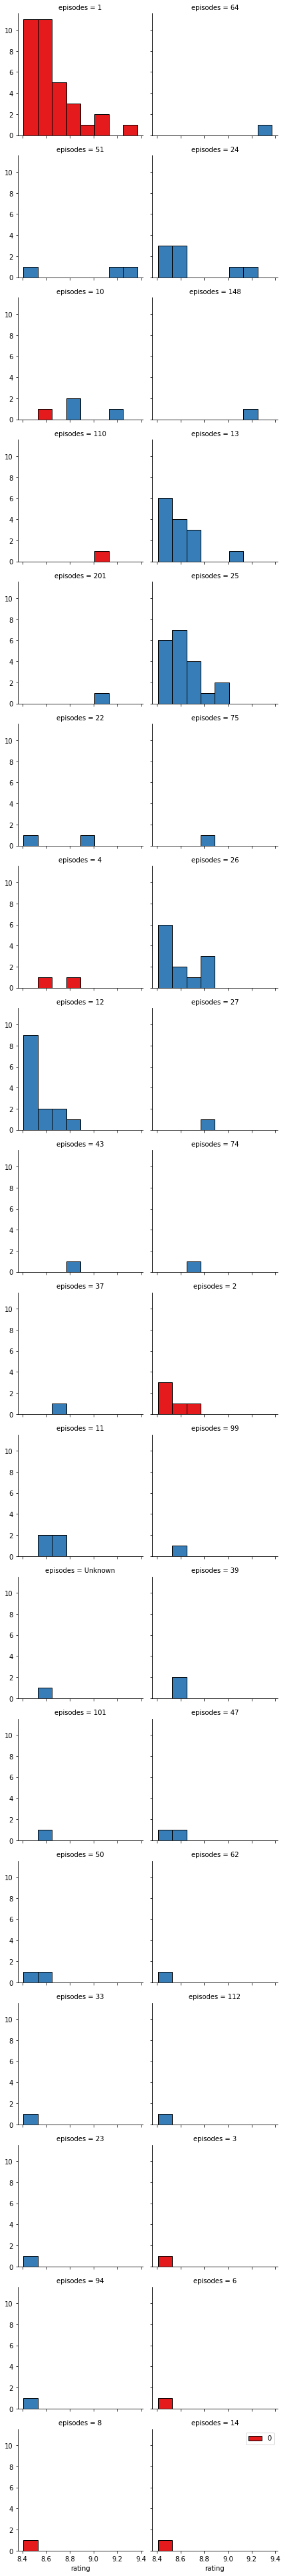

In [ ]:
import seaborn as sns
import numpy as np
#here we cheek the valoration of episodes on TV and the rating
df.head(150)
bins = np.linspace(df.rating.min(), df.rating.max(), 9)
g = sns.FacetGrid(df, col="episodes", hue="TV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'rating', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

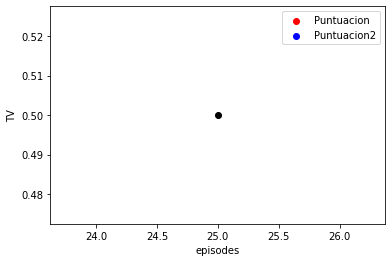

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
punto_new = {'episodes': [25],
             'TV': [0.5]}
punto_new = pd.DataFrame(punto_new)
ax = plt.axes()
ax.scatter(df.loc[df['rating'] == 'h', 'episodes'],
          df.loc[df['rating'] == 'h', 'TV'],
           c="red",
           label='Puntuacion')
ax.scatter(df.loc[df['rating']== 'm', 'episodes'],
           df.loc[df['rating'] == 'm', 'TV'],
           c="blue",
           label = "Puntuacion2")
ax.scatter(punto_new['episodes'],
           punto_new['TV'],
           c="black")
plt.xlabel("episodes")
plt.ylabel("TV")
ax.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
X_train = df[['TV', 'members']]
y_train = df[['rating']]
lm = LinearRegression()
lm.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print(lm.fit)


<bound method LinearRegression.fit of LinearRegression()>


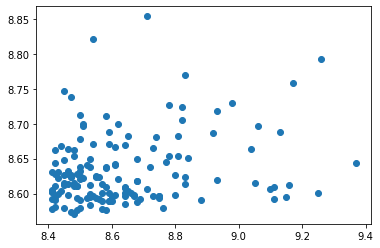

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
%matplotlib inline
#dispersion diagram
prediction = lm.predict(X_train)
py.scatter(y_train,prediction)

In [ ]:
from sklearn import metrics
#the typse of errors
print('MAE= ', metrics.mean_absolute_error(y_train,prediction) )
print('MSE= ', metrics.mean_squared_error(y_train,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, prediction)))

MAE=  0.15389150652115674
MSE=  0.04056408101295686
RMSE: 0.20140526560384875


In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.5, random_state=150
)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.20451422451069465

In [ ]:
test_preds = knn_model.predict(X_test)
mse= mean_squared_error(y_test, test_preds)
rmse= sqrt(mse)
rmse

0.18467747211688534